In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import random

In [16]:
df=pd.read_csv(r'D:\Y4project\EduRank\algebra_2005_2006_train.txt',sep='\t',header=None,engine='python')
df.shape[0]

809695

In [17]:
df.columns = df.iloc[0]
df2=df.drop(df.index[0])
#df2=df2[0:100000]
df2=df2[df2["Problem View"]=='1']
question_set=set(df2["Problem Name"])
student_set=set(df2["Anon Student Id"])
df2["Correct First Attempt"]=pd.to_numeric(df2["Correct First Attempt"])
df2["Incorrects"]=pd.to_numeric(df2["Incorrects"])
df2["Step Duration (sec)"]=pd.to_numeric(df2["Step Duration (sec)"])
df2

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
1,1,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG4-FIXED,1,3(x+2) = 15,2005-09-09 12:24:35.0,2005-09-09 12:24:49.0,2005-09-09 12:25:15.0,2005-09-09 12:25:15.0,40.0,NaN,40,0,2,3,1,[SkillRule: Eliminate Parens; {CLT nested; CLT...,1
2,2,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG4-FIXED,1,x+2 = 5,2005-09-09 12:25:15.0,2005-09-09 12:25:31.0,2005-09-09 12:25:31.0,2005-09-09 12:25:31.0,16.0,16,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",1~~1
3,3,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,1,2-8y = -4,2005-09-09 12:25:36.0,2005-09-09 12:25:43.0,2005-09-09 12:26:12.0,2005-09-09 12:26:12.0,36.0,NaN,36,0,2,3,1,"[SkillRule: Remove constant; {ax+b=c, positive...",2
4,4,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,1,-8y = -6,2005-09-09 12:26:12.0,2005-09-09 12:26:34.0,2005-09-09 12:26:34.0,2005-09-09 12:26:34.0,22.0,22,NaN,1,0,0,1,"[SkillRule: Remove coefficient; {ax+b=c, divid...",1~~1
11,11,0BrbPbwCMz,"Unit ES_04, Section ES_04-2",EG40,1,-7-3x = -2,2005-09-09 12:29:41.0,2005-09-09 12:30:27.0,2005-09-09 12:30:27.0,2005-09-09 12:30:27.0,46.0,46,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",6~~3
12,12,0BrbPbwCMz,"Unit ES_04, Section ES_04-2",EG40,1,-7-3x+7 = -2+7,2005-09-09 12:30:27.0,2005-09-09 12:30:34.0,2005-09-09 12:30:45.0,2005-09-09 12:30:49.0,22.0,NaN,22,0,1,0,2,[SkillRule: Add/Subtract; [Typein Skill: {Isol...,1
13,13,0BrbPbwCMz,"Unit ES_04, Section ES_04-2",EG40,1,-3x = 5,2005-09-09 12:30:49.0,2005-09-09 12:31:04.0,2005-09-09 12:31:04.0,2005-09-09 12:31:04.0,15.0,15,NaN,1,0,0,1,"[SkillRule: Remove coefficient; {ax+b=c, divid...",5~~3
14,14,0BrbPbwCMz,"Unit ES_04, Section ES_04-2",EG40,1,-3x/-3 = 5/-3,2005-09-09 12:31:04.0,2005-09-09 12:31:07.0,2005-09-09 12:31:07.0,2005-09-09 12:31:12.0,8.0,8,NaN,1,0,0,2,[SkillRule: Multiply/Divide; [Typein Skill: {R...,1
29,29,0BrbPbwCMz,"Unit ES_04, Section ES_04-3",EG54,1,-7 = -5(y+7),2005-09-09 12:35:08.0,2005-09-09 12:36:27.0,2005-09-09 12:37:01.0,2005-09-09 12:37:01.0,113.0,NaN,113,0,2,3,1,[SkillRule: Eliminate Parens; {CLT nested; CLT...,2
30,30,0BrbPbwCMz,"Unit ES_04, Section ES_04-3",EG54,1,7/5 = y+7,2005-09-09 12:37:01.0,2005-09-09 12:37:09.0,2005-09-09 12:37:09.0,2005-09-09 12:37:09.0,8.0,8,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",10


In [18]:
remove_student=set()
a=[]
start = time.time()
for s in student_set:
    df_temp=df2[df2["Anon Student Id"]==s]
    n=len(set(df_temp["Problem Name"]))
    a.append(n)
    if(n<100):
        remove_student.add(s)
end = time.time()
print(end - start)

28.960407972335815


In [19]:
student_set.difference_update(remove_student)
df2=df2[df2["Anon Student Id"].isin(student_set)]
question_set=set(df2["Problem Name"])
priors={}
for q in question_set:
    priors[q]=[]

In [20]:
difficulty_rankings={}
start = time.time()
for s in student_set:
    #print(s)
    df_temp1=df2[df2["Anon Student Id"]==s]
    ranking=[]
    for q in set(df_temp1["Problem Name"]):
        df_temp2=df_temp1[df_temp1["Problem Name"]==q]
        n=len(df_temp2)
        #First rank based on scores
        score=df_temp2["Correct First Attempt"].sum()/n
        priors[q].append(score)
        #Then tie breaks on incorrect attempts
        attempts=df_temp2["Incorrects"].sum()/n
        #Then tie breaks on time taken
        ranking.append((q,score,attempts,timetaken))
    r=sorted(ranking, key=lambda x:(x[1],-x[2],-x[3]))
    difficulty_rankings[s]=[x[0] for x in r]
end = time.time()
print(end - start)

56.97193765640259


In [21]:
priors_mean={}
for q in question_set:
    priors_mean[q]= np.mean(priors[q])
priors_mean

{'L5FB05': 0.8379419191919192,
 'LIT76': 0.32142857142857145,
 'EG13': 0.8266666666666668,
 'PERCENT02': 0.8122549019607843,
 'LIT37': 0.7365079365079366,
 'BH1T08': 0.7916666666666667,
 'TRANSFORMG047': 0.913657770800628,
 'TRANSFORMV011': 0.7471655328798186,
 'BH1T15B': 0.606060606060606,
 'LIT53A': 0.8392733323119408,
 'PERCENT01A': 0.7511908146054488,
 'EG30': 0.6721356963838166,
 'PERCENT05': 0.8529934526258056,
 'TRANSFORMA045': 0.6349206349206349,
 'LIT18': 0.726086956521739,
 'BH1T22': 0.6766666666666666,
 'PERCENT03A': 0.8344887955182072,
 'PSNPOLEVAULT': 0.764279013040623,
 'EG2': 0.7644702842377261,
 'DISTFB12_SP': 0.8026695526695526,
 'BH1T35C': 0.8071944006133139,
 'EG38': 0.5175438596491228,
 'BH1T52': 0.732637219407668,
 'TRANSFORMA007': 0.9523809523809524,
 'LIT11': 0.6957231040564372,
 '1PTB04': 0.7173433048433049,
 'LIT29': 0.640893057559724,
 'BH1T21': 0.7384323958557001,
 'TRANSFORMV001': 0.5979242979242979,
 'EG-EQS04': 0.664488017429194,
 'EG36': 0.625,
 'BH1T19':

In [22]:
print(len(student_set))
print(len(question_set))
df2

172
1078


,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
758,887,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R1C1,2005-09-09 12:23:50.0,2005-09-09 12:25:01.0,2005-09-09 12:25:01.0,2005-09-09 12:25:01.0,71.0,71,NaN,1,0,0,1,NaN,NaN
759,888,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R1C2,2005-09-09 12:25:01.0,2005-09-09 12:25:18.0,2005-09-09 12:25:18.0,2005-09-09 12:25:18.0,17.0,17,NaN,1,0,0,1,NaN,NaN
760,889,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R1C3,2005-09-09 12:25:18.0,2005-09-09 12:25:28.0,2005-09-09 12:25:28.0,2005-09-09 12:25:28.0,10.0,10,NaN,1,0,0,1,NaN,NaN
761,890,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R3C1,2005-09-09 12:25:31.0,2005-09-09 12:25:35.0,2005-09-09 12:25:35.0,2005-09-09 12:25:35.0,4.0,4,NaN,1,0,0,1,Define Variable,1
762,891,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R2C1,2005-09-09 12:25:28.0,2005-09-09 12:25:31.0,2005-09-09 12:25:41.0,2005-09-09 12:25:41.0,9.0,NaN,9,0,1,0,1,Identifying units,1
763,892,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R2C2,2005-09-09 12:25:41.0,2005-09-09 12:25:44.0,2005-09-09 12:25:44.0,2005-09-09 12:25:44.0,3.0,3,NaN,1,0,0,1,Identifying units,2
764,893,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R2C3,2005-09-09 12:25:44.0,2005-09-09 12:25:49.0,2005-09-09 12:25:49.0,2005-09-09 12:25:49.0,5.0,5,NaN,1,0,0,1,Identifying units,3
765,894,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R3C2,2005-09-09 12:25:49.0,2005-09-09 12:28:52.0,2005-09-09 12:29:37.0,2005-09-09 12:29:37.0,228.0,NaN,228,0,1,5,1,"Using simple numbers~~Write expression, positi...",1~~1~~1
766,895,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R3C3,2005-09-09 12:29:37.0,2005-09-09 12:29:52.0,2005-09-09 12:29:52.0,2005-09-09 12:29:52.0,15.0,15,NaN,1,0,0,1,Using simple numbers~~Using small numbers~~Wri...,2~~1~~2
767,896,2oNLCndtam,"Unit CTA1_12, Section CTA1_12-1",LDEMO_SYS,1,R4C2,2005-09-09 12:30:13.0,2005-09-09 12:30:15.0,NaN,2005-09-09 12:30:15.0,2.0,NaN,2,0,1,0,0,Using simple numbers~~Using large numbers~~Fin...,3~~2~~1


This is the histogram of number of questions solved vs number of students. We notice that a significant number of students solved less than 20 questions. This poses difficulties to infer the ranking for other questions as the information given is very limited. Hence, we took all such students out of consideration.

In [23]:
#histogram of number of questions solved vs number of students
print(np.histogram(a))

(array([303, 123,  33,  27,  44,  28,   7,   3,   4,   2], dtype=int64), array([  1. ,  58.1, 115.2, 172.3, 229.4, 286.5, 343.6, 400.7, 457.8,
       514.9, 572. ]))


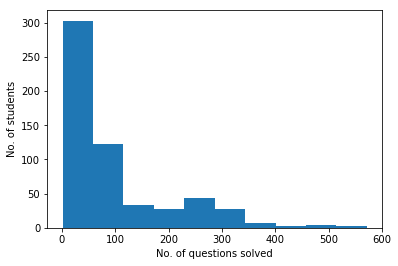

In [24]:
plt.hist(a)
plt.xlabel('No. of questions solved')
plt.ylabel('No. of students')
plt.show()

In [25]:
#Check whether one question is more difficult than the other
def rank(q1,q2,ranking):
    if(q1 not in ranking or q2 not in ranking):
        return False
    #return true if q1 is more difficult than q2
    return ranking.index(q1)<ranking.index(q2)

#win score over question pairs q1,q2 given a ranking 
def gamma(q1,q2,ranking):
    if(q1 not in ranking or q2 not in ranking):
        return 0
    return 1 if rank(q1,q2,ranking) else -1

#all question pairs in L such that qj>qk
def Zk(L,ranking,k):
    answer=[]
    for q in L:
        if(rank(q,k,ranking)):
            answer.append((q,k))
    return answer

#Indicator function
def IA(ranking1,ranking2,q1,q2):
    return 1 if (rank(q1,q2,ranking1) and rank(q1,q2,ranking2)) else 0

#normalized agreement score between two rankings
def Ak(L,ranking1,ranking2,k):
    Z=Zk(L,ranking2,k)
    if(len(Z)==0):
        return 0
    answer=0
    for (q1,q2) in Z:
        answer+=IA(ranking1,ranking2,q1,q2)
    #return answer/(ranking2.index(k))
    return answer/len(Z)

#AP score of ranking2 over L given reference ranking ranking1
def SAP(L,ranking1,ranking2):
    answer=0
    n=len(L)
    for i in range(1,n):
        answer+=Ak(L,ranking1,ranking2,L[i])
    return answer/(n-1)

#relative voting of two questions
def rv(q1,q2,S,si,Ti,ranking_i):
    a=0
    for j in S:
        if(j!=si):
            a+=SAP(Ti,ranking_i,difficulty_rankings[j])*gamma(q1,q2,difficulty_rankings[j])
    return np.sign(a)

#Copeland score
def c(q,S,si,Li,Ti,ranking_i):
    answer=0
    for ql in Li:
        if (ql!=q):
            answer+=rv(q,ql,S,si,Ti,ranking_i)
    return answer


In [26]:
#split questions into train and test sets
def split_questions(si):
    df3=df2[df2["Anon Student Id"]==si]
    qq=list(set(df3["Problem Name"]))
    n=int(len(qq)/2)
    return qq[0:n],qq[n:len(qq)],df3

#infer the difficulty ranking for a student, in decreasing order of difficulty
def rank_questions(df,train,test):
    #print(count)
    n=df.shape[0]
    ranking_train,ranking_test=[],[]
    for q in train:       
        #First rank based on scores
        score=df["Correct First Attempt"].sum()/n
        #Then tie breaks on incorrect attempts
        attempts=df["Incorrects"].sum()/n
        #Then tie breaks on time taken
        timetaken=df["Step Duration (sec)"].sum()/n
        ranking_train.append((q,score,attempts,timetaken))
    for q in test:       
        score=df["Correct First Attempt"].sum()/n
        attempts=df["Incorrects"].sum()/n
        timetaken=df["Step Duration (sec)"].sum()/n
        ranking_test.append((q,score,attempts,timetaken))
    a=sorted(ranking_train, key=lambda x:(x[1],-x[2],-x[3]))
    b=sorted(ranking_test, key=lambda x:(x[1],-x[2],-x[3]))
    return [x[0] for x in a],[x[0] for x in b]

In [27]:
len(difficulty_rankings[list(student_set)[0]])

252

In [28]:
SS=len(student_set)
QQ=len(question_set)
sset=list(student_set)
qset=list(question_set)
data=[[] for i in range(SS)]
for i in range(SS):
    train,test,df3=split_questions(sset[i])
    data[i].append(train)
    data[i].append(test)

In [41]:
GS=[]
for i in range(SS):
    ranking=difficulty_rankings[sset[i]]
    train,test,df3=split_questions(sset[i])
    t=len(train)
    Gamma=[[]for i in range(t)]
    for i in range(t):
        for j in range(t):
            Gamma[i].append(gamma(test[i],test[j],ranking))
    GS.append(np.array(Gamma))

In [63]:
alpha=[[[len([s for s in sset if qset[i] in difficulty_rankings[s] and qset[j] in difficulty_rankings[s]])
       for i in range()]]for ss in range]

(96, 96)

In [33]:
def EduRank(s):
    start = time.time()
    train=data[s][0]
    test=data[s][1]
    t=len(train)
    A=[[Ak(train,difficulty_rankings[sset[s]],difficulty_rankings[sset[i]],train[k])
        for k in range(t)]for i in range(SS) if i!=s]
    M=[np.mean(A[i]) for i in range(SS-1)]
    r=[[] for i in range(t)]
    for i in range(t):
        for j in range(t):
            rv=0
            s12=[s for s in sset if qset[i] in difficulty_rankings[s] and qset[j] in difficulty_rankings[s]]
            priori=priors_mean[qset[i]]
            priorj=priors_mean[qset[j]]
            alpha=len(s12)/SS
            for k in range(SS):
                if(k!=s):
                    rv+=M[k-1]*gamma(test[i],test[j],difficulty_rankings[sset[k]])
            rv=alpha*np.sign(rv)
            rv+=(1-alpha)*np.sign(priori-priorj)        
            r[i].append(rv)
    dict=[]
    for i in range(len(test)-1):
        dict.append((test[i],sum(r[i])))
    dict=sorted(dict, key=lambda x:-x[1])
    result=[x[0] for x in dict]
    result=SAP(test,difficulty_rankings[sset[s]],result)
    end = time.time()
    print(end - start)
    return result


In [9]:
# sap=0
# f = open("saved_data.txt", "w")
# for i in range(172):
#     f.write(sset[i])
#     f.write(' ')
#     f.write(str(EduRank(i)))
#     f.write('\n')
# f.close()

In [45]:
data2=[[] for i in range(10)]
for i in range (10):
    l=len(data[i][0])
    data2[i].append(data[i][0][0:int(0.1*l)])
    data2[i].append(data[i][1])

In [48]:
def EduRank_cold_start(s):
    start = time.time()
    train=data2[s][0]
    test=data2[s][1]
    t=len(train)
    te=len(test)
    A=[[Ak(train,difficulty_rankings[sset[s]],difficulty_rankings[sset[i]],train[k])
        for k in range(t)]for i in range(SS) if i!=s]
    M=[np.mean(A[i]) for i in range(SS-1)]
    r=[[] for i in range(te)]
    for i in range(te):
        for j in range(te):
            if(j!=i):
                rv=0
                s12=[s for s in sset if qset[i] in difficulty_rankings[s] and qset[j] in difficulty_rankings[s]]
                priori=priors_mean[qset[i]]
                priorj=priors_mean[qset[j]]
                alpha=len(s12)/SS
                for k in range(SS):
                    if(k!=s):
                        rv+=M[k-1]*gamma(test[i],test[j],difficulty_rankings[sset[k]])
                rv=alpha*np.sign(rv)
                rv+=(1-alpha)*np.sign(priori-priorj)        
                r[i].append(rv)
    dict=[]
    for i in range(len(test)):
        dict.append((test[i],sum(r[i])))
    dict=sorted(dict, key=lambda x:-x[1])
    result=[x[0] for x in dict]
    result=SAP(test,difficulty_rankings[sset[s]],result)
    end = time.time()
    print(end - start)
    return result

In [49]:
sap=0
f = open("saved_data2.txt", "w")
for i in range(10):
    f.write(sset[i])
    f.write(' ')
    f.write(str(EduRank_cold_start(i)))
    f.write('\n')
f.close()

34.5779926776886
57.78541088104248
70.93920350074768
43.68081307411194
28.483027696609497
34.95912837982178
8.275187730789185
5.70877480506897
73.74838018417358
32.996315002441406


In [ ]:
def EduRank_no_cold_start(s):
    start = time.time()
    train=data2[s][0]
    test=data2[s][1]
    t=len(train)
    te=len(test)
    A=[[Ak(train,difficulty_rankings[sset[s]],difficulty_rankings[sset[i]],train[k])
        for k in range(t)]for i in range(SS) if i!=s]
    M=[np.mean(A[i]) for i in range(SS-1)]
    r=[[] for i in range(te)]
    for i in range(te):
        for j in range(te):
            if(j!=i):
                rv=0
                s12=[s for s in sset if qset[i] in difficulty_rankings[s] and qset[j] in difficulty_rankings[s]]
                priori=priors_mean[qset[i]]
                priorj=priors_mean[qset[j]]
                alpha=len(s12)/SS
                for k in range(SS):
                    if(k!=s):
                        rv+=M[k-1]*gamma(test[i],test[j],difficulty_rankings[sset[k]])
                rv=alpha*np.sign(rv)
                rv+=(1-alpha)*np.sign(priori-priorj)        
                r[i].append(rv)
    dict=[]
    for i in range(len(test)):
        dict.append((test[i],sum(r[i])))
    dict=sorted(dict, key=lambda x:-x[1])
    result=[x[0] for x in dict]
    result=SAP(test,difficulty_rankings[sset[s]],result)
    end = time.time()
    print(end - start)
    return result

In [ ]:
sap=0
f = open("saved_data3.txt", "w")
for i in range(10):
    f.write(sset[i])
    f.write(' ')
    f.write(str(EduRank(i)))
    f.write('\n')
f.close()